# 평가

### 분류모델 평가

#### 정확도 (Accuracy)
- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적인 성능을 낼 수 있음

In [2]:
# 잘못 학습된 모델 만들어보기
from sklearn.base import BaseEstimator
import numpy as np

# 성별로만 판별하는 모델 작성
class MyTitanicClassifier(BaseEstimator):
    def fit(self, X, y):
        # 훈련 메서드
        pass

    def predict(self, X):
        # 결과 예측 메서드
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            sex = X['Sex'].iloc[i]
            if sex == 0:    # 여성
                pred[i] = 1     # 생존
        return pred

In [3]:
# 전처리 -> 함수
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')

    return df

def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    df['Cabin'] = df['Cabin'].str[:1]    # Cabin 데이터의 앞 글자만 가져옴

    categories = ['Sex', 'Cabin', 'Embarked']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    
    return df
    
def scailing_feature(train_data, test_data):
    """
    특성 스케일링
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    
    return train_scaled, test_scaled

def preprocess_data(df):
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)

    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.metrics import accuracy_score

# 모델 훈련
my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 평가 (accuracy_score 사용)
print("훈련 데이터 정확도:", accuracy_score(y_train, pred_train))
print("평가 데이터 정확도:", accuracy_score(y_test, pred_test))

훈련 데이터 정확도: 0.7889221556886228
평가 데이터 정확도: 0.7802690582959642


##### 혼동행렬 (Confusion Matrix)

![](https://d.pr/i/rtYBJv+)

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

- 정밀도 (Precision)
    - 양성이라고 예측한 것(TP + FP) 중에 실제 양성(TP)일 확률
    - 정밀도가 중요한 지표인 경우: 음성인 데이터를 양성으로 예측하면 안되는 경우 (스팸메일 분류 등)

In [7]:
matrix = confusion_matrix(y_test, pred_test)
matrix

array([[115,  24],
       [ 25,  59]], dtype=int64)

In [8]:
p_score = 59 / (24 + 59)
p_score, precision_score(y_test, pred_test)

(0.7108433734939759, 0.7108433734939759)

- 재현율
    - 실제 양성(TP+FN) 중에 양성으로 예측(TP)한 확률
    - 재현율이 중요한 지표인 경우 : 양성인 데이터를 음성으로 예측하면 안되는 경우 (암 진단, 보험/금융 사기 등)

In [9]:
recall_score(y_test, pred_test)

0.7023809523809523

In [10]:
# 잘못 학습된 모델 만들어보기 2
class MyDeathClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((X.shape[0], 1))    # 전부 사망
    
my_classifier = MyDeathClassifier()
my_classifier.fit(X_train, y_train)

pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

print("훈련 데이터 혼동행렬:\n", confusion_matrix(y_train, pred_train))
print("훈련 데이터 정확도:\n", accuracy_score(y_train, pred_train))
print("훈련 데이터 정밀도:\n", precision_score(y_train, pred_train))
print("훈련 데이터 재현율:\n", recall_score(y_train, pred_train))

print("평가 데이터 혼동행렬:\n", confusion_matrix(y_test, pred_test))
print("평가 데이터 정확도:\n", accuracy_score(y_test, pred_test))
print("평가 데이터 정밀도:\n", precision_score(y_test, pred_test))
print("평가 데이터 재현율:\n", recall_score(y_test, pred_test))

훈련 데이터 혼동행렬:
 [[410   0]
 [258   0]]
훈련 데이터 정확도:
 0.6137724550898204
훈련 데이터 정밀도:
 0.0
훈련 데이터 재현율:
 0.0
평가 데이터 혼동행렬:
 [[139   0]
 [ 84   0]]
평가 데이터 정확도:
 0.6233183856502242
평가 데이터 정밀도:
 0.0
평가 데이터 재현율:
 0.0


c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# 오차행렬, 정확도, 정밀도, 재현율 계산 및 출력 함수
def evalute_binary_classification(y_true, y_pred):
    print('혼동행렬:\n', confusion_matrix(y_true, y_pred))
    print(f'정확도: {accuracy_score(y_true, y_pred)}, 정밀도: {precision_score(y_true, y_pred)}, 재현율: {recall_score(y_true, y_pred)}')

In [12]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('./data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 훈련
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 예측 및 평가
pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)
evalute_binary_classification(y_train, pred_train)
evalute_binary_classification(y_test, pred_test)

혼동행렬:
 [[350  60]
 [ 77 181]]
정확도: 0.7949101796407185, 정밀도: 0.7510373443983402, 재현율: 0.7015503875968992
혼동행렬:
 [[116  23]
 [ 23  61]]
정확도: 0.7937219730941704, 정밀도: 0.7261904761904762, 재현율: 0.7261904761904762


c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도-재현율의 trade-off
    - 분류 결정 임계치(threshold)를 낮추면? Positive로 예측할 확률이 높아진다!
        - 정밀도는 낮아지고, 재현율은 높아진다.
    - 분류 결정 임계치(threshold)를 높이면? Positive로 예측할 확률이 낮아진다!
        - 정밀도는 높아지고, 재현율은 낮아진다.

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
print(pred_proba[:7])

pred = lr_clf.predict(X_test)
print(pred[:7])

[[0.83789169 0.16210831]
 [0.8887822  0.1112178 ]
 [0.9209338  0.0790662 ]
 [0.05566891 0.94433109]
 [0.29713555 0.70286445]
 [0.5055174  0.4944826 ]
 [0.09160747 0.90839253]]
[0 0 0 1 1 0 1]


In [14]:
from sklearn.preprocessing import Binarizer

temp_X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]
binarizer = Binarizer(threshold=0)
adj_X = binarizer.fit_transform(temp_X)
adj_X

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [15]:
from sklearn.preprocessing import Binarizer

predict_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=0.5)
custom_pred = binarizer.fit_transform(predict_proba_1)
evalute_binary_classification(y_test, custom_pred)

혼동행렬:
 [[116  23]
 [ 23  61]]
정확도: 0.7937219730941704, 정밀도: 0.7261904761904762, 재현율: 0.7261904761904762


In [16]:
# 임계치 별 평가 방법 확인
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def evaluate_by_threshold(y_true, y_pred, threshold):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evalute_binary_classification(y_true, custom_pred)

evaluate_by_threshold(y_test, predict_proba_1, thresholds)

혼동행렬:
 [[109  30]
 [ 19  65]]
정확도: 0.7802690582959642, 정밀도: 0.6842105263157895, 재현율: 0.7738095238095238
혼동행렬:
 [[114  25]
 [ 19  65]]
정확도: 0.8026905829596412, 정밀도: 0.7222222222222222, 재현율: 0.7738095238095238
혼동행렬:
 [[116  23]
 [ 23  61]]
정확도: 0.7937219730941704, 정밀도: 0.7261904761904762, 재현율: 0.7261904761904762
혼동행렬:
 [[121  18]
 [ 23  61]]
정확도: 0.8161434977578476, 정밀도: 0.7721518987341772, 재현율: 0.7261904761904762
혼동행렬:
 [[124  15]
 [ 30  54]]
정확도: 0.7982062780269058, 정밀도: 0.782608695652174, 재현율: 0.6428571428571429


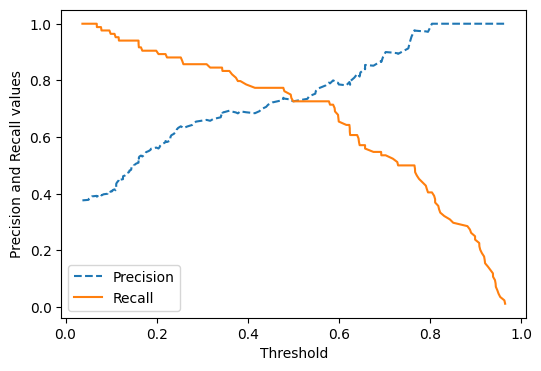

In [17]:
# 정밀도-재현율 변화 과정 시각화
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# threshold에 따른 precision, recall 값 반환
precisions, recalls, thresholds = precision_recall_curve(y_test, predict_proba_1)

# 기준 thresholds 211개
# - 정밀도와 재현율에 추가된 마지막 값은 극단적 임계값 설정에 대한 계산 결과
# - 정밀도는 마지막에 1 추가 (임계값이 매우 낮아 모든 샘플이 양성으로 예측된 경우)
# - 재현율은 마지막에 0 추가(임계값이 매우 높아 모든 샘플이 음성으로 예측된 경우)
# precisions.shape, recalls.shape, thresholds.shape

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precisions[:-1], linestyle='--', label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall values')
plt.legend()
plt.show()

- F1-score
    - 정밀도와 재현율을 결합한 지표

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_test)

0.7261904761904762

### ROC Curve - AUC
- ROC Curve (Receiver Operation Characteristic Curve, 수신자 조작 특성 커브)
    - x축 : FPR (False Positive Rate), 실제 음성을 잘못 예측한 비율
        - FPT = FP/(FP + TN)
    - y축 : TPR (True Positive Rate), recall score
        - TPR = TP/(FN + TP)
- AUC(Area Under Curve): ROC 곡선 아래 면적 (1에 가까울수록 성능 좋음)

In [19]:
from sklearn.metrics import roc_curve

y_true_sample = np.array([0, 0, 1, 1])
y_pred_sample = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_sample, y_pred_sample)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


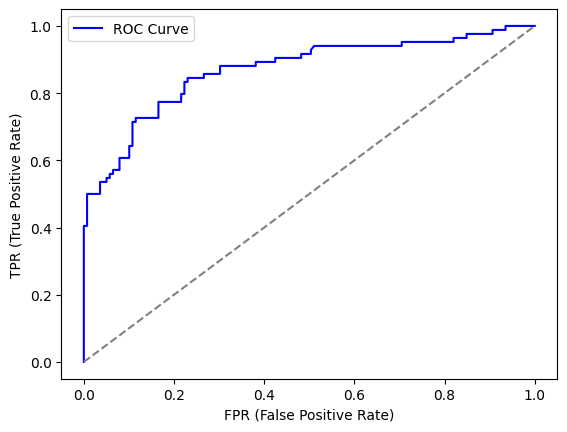

In [ ]:
from sklearn.metrics import auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)




### 회귀 모델 평가

In [20]:
# 샘플 데이터

y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0, 2, 9]

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import r2_score